In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import sys

import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
# from mpl_toolkits.axes_grid1 import make_axes_locatable
params = {'font.size':14,'font.family':'lmodern','xtick.labelsize':16, 'ytick.labelsize':16,}

# plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')

import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import IVCurve as IVCurve
import importlib
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erfc
import scipy.signal as spsig

In [23]:
importlib.reload(Monitor)

<module 'StandMonitor' from '../../../purity-monitor\\StandMonitor.py'>

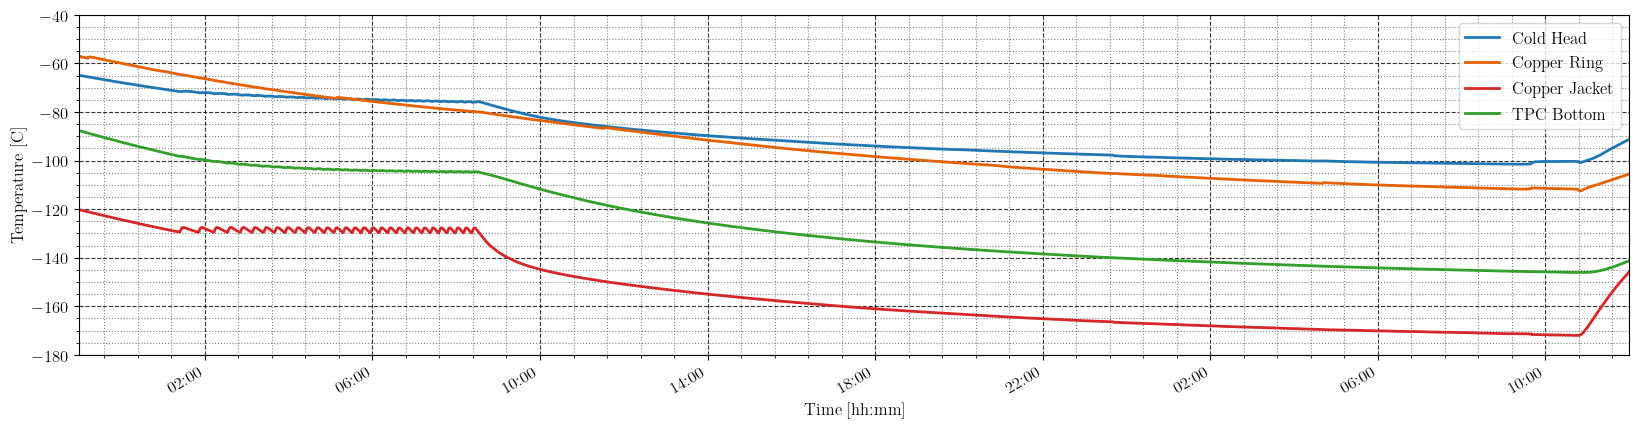

In [3]:
Sensors = []
Files = ['C:/Data/StandStatus/20240419.h5','C:/Data/StandStatus/20240420.h5', 'C:/Data/StandStatus/20240421.h5' ]
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2024,4,19,23,0), dt.datetime(2024,4,21,12,0)]
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-180,-40])

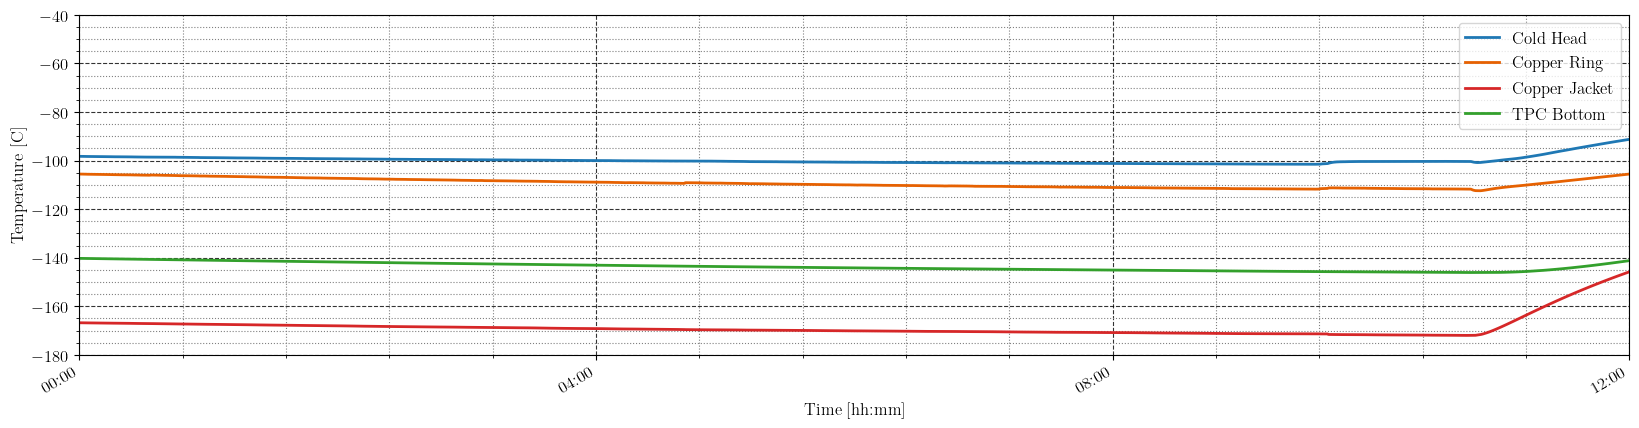

In [4]:
Sensors = []
Files = ['C:/Data/StandStatus/20240421.h5' ]
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2024,4,21,0,0), dt.datetime(2024,4,21,12,0)]
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-180,-40])

In [5]:
# plt.plot(AllSensors.Time,AllSensors.Temp[2])
# plt.show()

In [6]:
time_min=[]
start=dt.datetime(2024,4,19,11,0)
for time in AllSensors.Time:
    time_min.append((time-start).minutes)
plt.figure(figsize=(10,6))
plt.xlabel('(s)')
plt.ylabel('Temperature of SiPM (C)')
plt.plot(time_min,AllSensors.Temp[0])
plt.show()

AttributeError: 'datetime.timedelta' object has no attribute 'minutes'